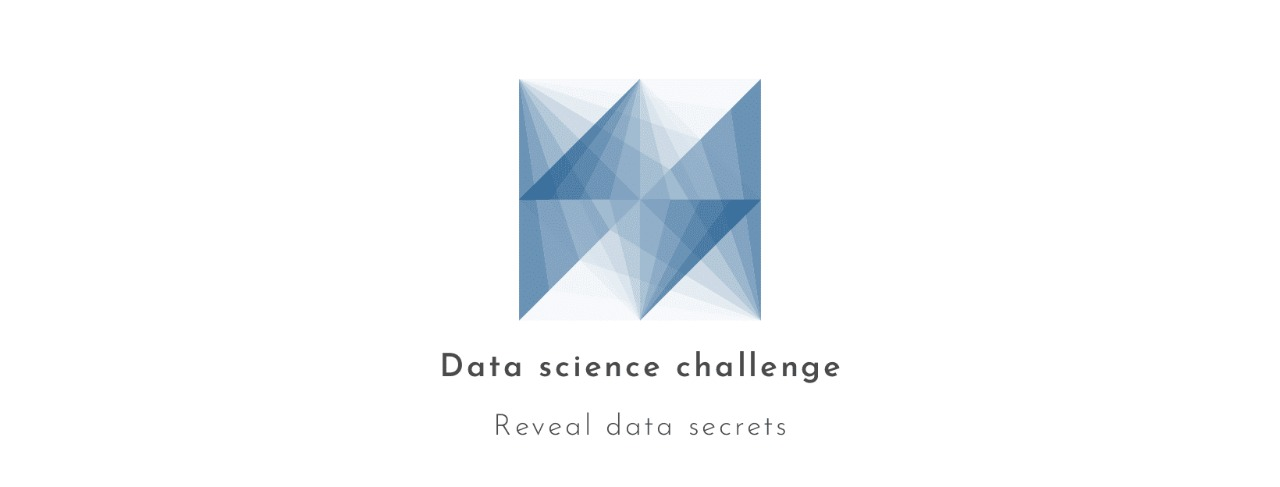

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Read Data

In [2]:
df = pd.read_csv('../input/flight-price-prediction/Clean_Dataset.csv')
df.head()

In [3]:
df1 = pd.read_csv('../input/flight-price-prediction/business.csv')
df2 = pd.read_csv('../input/flight-price-prediction/economy.csv')

In [4]:
df1.head()

In [5]:
df2.head()

In [6]:
df1['price'] = df1['price'].str.replace(',', '')
df1['price'] = df1['price'].astype(int)

df2['price'] = df2['price'].str.replace(',', '')
df2['price'] = df2['price'].astype(int)


In [7]:
df1['stop'] = df1['stop'].str.replace('\n', '')
df1['stop'] = df1['stop'].str.replace('\t', '')
df1['stop'].str.strip()

df2['stop'] = df2['stop'].str.replace('\n', '')
df2['stop'] = df2['stop'].str.replace('\t', '')
df2['stop'].str.strip()

In [8]:
df1['time_taken'] = df1['time_taken'].apply(lambda x: x.split("h")[0])
df1['time_taken'] = df1['time_taken'].astype(float)

df2['time_taken'] = df2['time_taken'].apply(lambda x: x.split("h")[0])
df2['time_taken'] = df2['time_taken'].astype(float)



In [9]:
df1['time_taken'] = df1['time_taken'].astype(int)
df2['time_taken'] = df2['time_taken'].astype(int)

In [10]:
df1['date'] = pd.to_datetime(df1['date'], format='%d-%m-%Y')
df1.dtypes

In [11]:
df2['date'] = pd.to_datetime(df2['date'], format='%d-%m-%Y')
df2.dtypes

In [12]:
print("Cleand Dataset Shape:", df.shape)
print("Business Dataset Shape:", df1.shape)
print("Economy Dataset Shape:", df2.shape)

In [13]:
df1['class'] = 'Business'

In [14]:
df2['class'] = 'Economy'

In [15]:
display(df2.head())

df.head()

In [16]:
new_df=pd.concat([df1, df2])
new_df.info()

In [17]:
new_df.date.value_counts()

In [18]:
new_df.head()

In [19]:
new_df.ch_code.value_counts()

In [20]:
new_df['num_code'].value_counts()

In [21]:
new_df.stop.value_counts()

In [22]:
df['flight'].value_counts()

In [23]:
df.info()

In [24]:
df3=df.drop(['Unnamed: 0'],axis=1)
df3.head()

In [25]:
df3['days_left'] = df3['days_left'].astype(int)

In [26]:
df3.info()

In [27]:
df3.duration.value_counts().sort_values()

In [28]:
df3.describe().T

In [29]:
df.isnull().sum()

In [30]:
sns.heatmap(df1.isnull())

In [31]:
df3['source_city'].value_counts()

In [32]:
df3['destination_city'].value_counts()

In [33]:
df3['stops'].unique()

In [34]:
new_df.corr().style.background_gradient()

# Data Visualization Questions 

## airline, class, stops for price

In [35]:
plt.figure(figsize=(20, 10))
sns.countplot(x='airline',hue='class' ,data=new_df).set(title='airline count based on class')

In [36]:
# From graph we can see that Jet Vistara have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "price", x = "airline", data = df3.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [37]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
sns.barplot(x='source_city', y='price', data=df3.sort_values('source_city', axis=0), ax=axes[0])
axes[0].set(title='Price variation based on source city')

sns.barplot(x='destination_city', y='price', data=df3.sort_values('destination_city', axis=0), ax=axes[1])
axes[1].set(title='Price variation based on destination city');


In [38]:
sns.relplot(col="airline", y="price", kind="line",x='stops', data=df3, col_wrap=2)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; This explains a little bit about why <code>Vsitara</code> and <code>Air India</code> are the most expensive airlines, as we can see the one-stop condition is the highest price among the others.
</div>


## source and destenation city respect to stops.

In [39]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
sns.barplot(x='airline', y='price', data=df3.sort_values('airline', axis=0), ax=axes[0])
axes[0].set(title='Price variation based on airline')

sns.countplot(x='airline',hue='stops', data=df3.sort_values('stops', axis=0), ax=axes[1])
axes[1].set(title='Airline count based on stop');


In [40]:
plt.figure(figsize=(20, 10))
sns.countplot(x='source_city',hue='stops',data=df3).set(title='Source city count based on stops')

In [41]:
plt.figure(figsize=(20, 10))
sns.countplot(x='destination_city',hue='stops',data=df3).set(title='Destination city count based on stops')

In [42]:
# Source vs Price

sns.catplot(y = "price", x = "source_city", data = df3.sort_values("price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; The one stop condition is the most common one according to the graphs and the hieghst price.
</div>


## Arrival and departure time 

In [43]:
plt.figure(figsize=(20, 10))
sns.countplot(x='arrival_time',hue='stops',data=df3).set(title='Arrival time count based on stops')

In [44]:
plt.figure(figsize=(20, 10))
sns.countplot(x='departure_time',hue='stops',data=df3).set(title='Departure time count based on stops')

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; most of flights with one stop happend on <code>Night on the arrival time</code> and <code>Morning on the departure time</code>.</div>


## Airways service 

In [45]:
plt.figure(figsize=(20, 10))
sns.countplot(x='ch_code', data=new_df).set(title='Airways service count')

In [46]:
plt.figure(figsize=(20, 10))
sns.barplot(x='ch_code', y='price' ,data=new_df).set(title='Price variation based on airways service')

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; based on the last two graphs the <code>UK</code> airways service is the most expensive airways and the most common one.
</div>


In [47]:
plt.figure(figsize=(20, 15))
sns.stripplot(x='airline',y='price',hue='days_left',data=df3).set(title='Price variation based on airline respect to days left')

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#6fa8dc;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 5px;
              color:white;">
           
**Question) Does the ticket booking date affect the price?**
> The price changes depending on the date of booking the ticket, especially if it is booked a day or two before the flight date, the price will become higher. Also there is a drop in prices one day before the departure.


In [48]:
sns.relplot(col="departure_time", y="price", kind="line",x='arrival_time', data=df3, col_wrap=3)

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#6fa8dc;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 5px;
              color:white;">
            
**Question) Do the times of the day affect the price?**
> The price changing based on the departure time and arrival time we can see some patterns such as when departure time is evening and Arrival time is night this is lowering the price.

In [49]:
sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df3, col_wrap=3)


 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#6fa8dc;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 5px;
              color:white;">

**Question) Does the destination and source city affect the price?**
> Yes, and we can see from the above some information such Delhi price will be high if your destination is bangalore.

In [50]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline', y='price',hue='class' ,data=df3).set(title='Price variation based on airline respect to class')

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Here we can see some vast variations in Economy class and Business class but this only happened in the two airlines.
</div>


In [51]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue='stops',data=df3).set(title='Price variation based on airline respect to stops')

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#6fa8dc;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 5px;
              color:white;">
            
**Question) Does the stops affect the price?**
> Yes, and we can see the price is much lower in flight that has zero stops, and for both <code>Vistara</code> and <code>Air India</code> the one stop is much higher price than other airlines.

In [52]:
fig, axes = plt.subplots(1,2, figsize=(20,10))

sns.barplot(x='airline', y='price',hue='class' ,data=df1, ax=axes[0])
axes[0].set(title='Business class price variation based on airline')
sns.barplot(x='airline', y='price',hue='class' ,data=df2, ax=axes[1])
axes[1].set(title='Economy class price variation based on airline')



<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; The most expensive airline is <code>Vistara</code> and the second is <code>Air India</code> in both class.
</div>

## Time Series analysis

In [53]:
trace1 = go.Scatter(
                    x = df1.date,
                    y = df1.price,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df1.to)

data = [trace1]
layout = dict(title = 'Price variation with dates destnation cities on business class',
              xaxis= dict(title= 'Price Variation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [54]:
trace1 = go.Scatter(
                    x = df2.date,
                    y = df2.price,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df2.to)

data = [trace1]
layout = dict(title = 'Price variation with dates destnation cities on economy class',
              xaxis= dict(title= 'Price Variation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [55]:
trace1 = go.Scatter(
                    x = df1.date,
                    y = df1.price,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df1['from'])

data = [trace1]
layout = dict(title = 'Price variation with dates departure cities on business class',
              xaxis= dict(title= 'Price Variation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [56]:
trace1 = go.Scatter(
                    x = df2.date,
                    y = df2.price,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df2['from'])

data = [trace1]
layout = dict(title = 'Price variation with dates departure cities on economy class',
              xaxis= dict(title= 'Price Variation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [57]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='date', y='price',hue='to' ,data=df1, ci=None).set(title="date and time respect to destantion city in business class")
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; <code>Kolkata</code> is the highest destination city price among the others in business class.
</div>

In [58]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='date', y='price',hue='from' ,data=df1, ci=None).set(title="date and time respect to depature city in business class")
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; <code>Kolkata</code> is the highest departure city price among the others in business class.
</div>

In [59]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='date', y='price',hue='to' ,data=df2, ci=None).set(title="date and time respect to destination city in economy class")
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; <code>Kolkata</code> is the highest departure city price among the others in economy class, and there are maybe some seasons on dates before 02-22 because the prices are much higher on this dates.
</div>

In [60]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='date', y='price',hue='from' ,data=df2, ci=None).set(title="date and time respect to departure city in business class")
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; <code>Kolkata</code> is the highest destination city price among the others in economy class, and there are maybe some seasons on dates before 02-22 because the prices are much higher on this dates.
</div>

In [61]:
dataframe = new_df.set_index("date")
dataframe

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; The most expensive cities are <code>Chennai</code> and <code>Kolkata</code>.
</div>

In [62]:
df3['price_per_minute'] = df3['price']/df3['duration']*60

In [63]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.kdeplot(df3.price)

plt.subplot(1,2,2)
plt.title('Price per minute Distribution Plot')
sns.kdeplot(df3.price_per_minute)

plt.show()


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; The price per minute is skewed at the beginning to the lowest prices.
</div>

# Modeling

In [64]:
df3.columns

In [65]:
df3.info()

In [66]:
df3['departure_time'].value_counts()

In [67]:
df3['arrival_time'].value_counts()

In [68]:
df3['source_city'].value_counts()

In [69]:
df3['stops'].value_counts()

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler

In [71]:
# As airline is Nominal Categorical data we will perform OneHotEncoding

airline = df3[["airline"]]

airline = pd.get_dummies(airline, drop_first= True)

airline.head()

In [72]:
# As source city is Nominal Categorical data we will perform OneHotEncoding

source = df3[["source_city"]]

source = pd.get_dummies(source, drop_first= True)

source.head()

In [73]:
# As departure time is Nominal Categorical data we will perform OneHotEncoding

departure = df3[["departure_time"]]

departure = pd.get_dummies(departure, drop_first= True)

departure.head()

In [74]:
# As departure time is Nominal Categorical data we will perform OneHotEncoding

arrival = df3[["arrival_time"]]

arrival = pd.get_dummies(arrival, drop_first= True)

arrival.head()

In [75]:
# As destenation city is Nominal Categorical data we will perform OneHotEncoding

destination = df3[["destination_city"]]

destination = pd.get_dummies(destination, drop_first= True)

destination.head()

In [76]:
df3.replace({"zero": 0, "one": 1, "two_or_more": 2}, inplace = True)

In [77]:
df3.replace({"Economy": 0, "Business": 1}, inplace = True)

In [78]:
df4 = pd.concat([df3, airline, source, departure, arrival, destination], axis = 1)

In [79]:
df4.head()

In [80]:
df4.drop(["airline", "flight", 'source_city', "departure_time", 'arrival_time', 'destination_city', 'price_per_minute'], axis = 1, inplace = True)

In [81]:
df4.head()

In [82]:
X = df4.drop(['price'], axis=1)
y = df4['price']

In [83]:
X

In [84]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

In [85]:
print(selection.feature_importances_)

In [86]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [87]:
#cat_columns = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class']
#num_columns = ['duration','days_left']

In [88]:
#encoder = OrdinalEncoder().fit_transform(df3[cat_columns])
#encoder = pd.DataFrame(encoder,columns = cat_columns)

In [89]:
#X = pd.concat([encoder,df3[num_columns]],axis=1)
#y = df3['price']

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

# Linear Regression Model

In [109]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

In [110]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print('Mean Absolute Error', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Gradient Boosting Regressor

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

gbre = GradientBoostingRegressor()
gbre.fit(X_train, y_train)
y_pred = gbre.predict(X_test)
print(y_pred)

In [112]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print('Mean Absolute Error', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Random Forest Regressor

In [113]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(y_pred)

In [118]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print('Mean Absolute Error', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [114]:
plt.figure(figsize = (8,8))
sns.kdeplot(y_test-y_pred)
plt.show()

In [115]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; <code>Random Forest Regressor</code> is the highest model based on the metrics.
</div>

## Saving the model

In [119]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(regr, file)

In [120]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [121]:
y_prediction = forest.predict(X_test)

In [122]:
r2_score(y_test, y_prediction)